In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
import gym
import numpy as np

env = gym.make('FrozenLake-v0')

[2017-11-15 14:47:28,869] Making new env: FrozenLake-v0


In [4]:
from gym.envs.registration import register
register(
    id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False},
    max_episode_steps=100,
    reward_threshold=0.78, # optimum = .8196
)

env = gym.make('FrozenLakeNotSlippery-v0')

Error: Cannot re-register id: FrozenLakeNotSlippery-v0

# Train

Score over time: 1.0


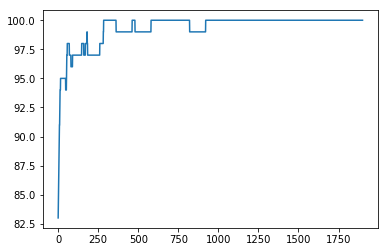

In [47]:
Q= np.zeros((env.observation_space.n, env.action_space.n))
y = 0.95
lr = 0.1
num_episodes = 2000

rList = []
alpha=np.log(0.000001)/num_episodes
for i in range(num_episodes):
    lr= np.exp(alpha*i) #adaptive learning start with exploration
    s = env.reset()
    rAll = 0
    done=False
    #The Q-Table learning algorithm
    while done==False:
        #randomly exploration of precisely choose best action
        if np.random.rand() < lr*0.1:
            a = np.random.randint(env.action_space.n)
        else:
            a = np.argmax(Q[s,:] )
        #get new state and reward from environment
        s1,reward,done,_ = env.step(a)
        #giving panalty to Hole and no move
        if done:
            r = 1.0 if reward > 0.0 else -1.0
        else:
            r = -0.01
        #Update Q-Table with new knowledge
        Q[s,a] = Q[s,a] +  lr*(r + y*np.max(Q[s1,:]) - Q[s,a])
        rAll += reward
        s = s1
        if done == True:
            break
    rList.append(rAll)
print ("Score over time: " +  str(sum(rList[-100:])/100.0))
plt.plot(np.convolve(np.ones(100),rList,"valid"))

# Play

In [4]:
s = env.reset()
d=False
n=0
while d==False:
    n+=1
    a = np.argmax(Q[s,:])
    s,r,d,x = env.step(a)
    #print("%s %s %s %s"%(s,r,d,x))
env.render()
print n

  (Right)
SFFF
FHFH
FFFH
HFFG
6


In [34]:
s = env.reset()
env.render()


SFFF
FHFH
FFFH
HFFG


In [46]:
env.step(2)
env.render()

  (Right)
SFFF
FHFH
FFFH
HFFG


# 